In [3]:
import numpy as np
import os
import platform
import caveclient
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plat = platform.platform()

In [4]:
if 'amzn' in plat:
    data_dir = '/data/microns_in_silico/'
else:
    data_dir = '/data/microns_in_silico/'

#data_dir = '/Users/forrestc/Downloads/microns_in_silico/'

In [5]:

resp=np.load(os.path.join(data_dir, 'nat_resp.npy'))

In [6]:
client= caveclient.CAVEclient('minnie65_public', auth_token=os.environ['API_SECRET'])

In [7]:
client.materialize.get_tables()

['synapses_pni_2',
 'baylor_gnn_cell_type_fine_model_v2',
 'nucleus_alternative_points',
 'connectivity_groups_v507',
 'proofreading_status_public_release',
 'allen_column_mtypes_v1',
 'allen_v1_column_types_slanted_ref',
 'aibs_column_nonneuronal_ref',
 'nucleus_ref_neuron_svm',
 'aibs_soma_nuc_exc_mtype_preds_v117',
 'baylor_log_reg_cell_type_coarse_v1',
 'apl_functional_coreg_forward_v5',
 'nucleus_detection_v0',
 'aibs_soma_nuc_metamodel_preds_v117',
 'coregistration_manual_v3']

In [8]:
coreg_df = client.materialize.query_table('coregistration_manual_v3')

In [9]:
units_df = pd.read_csv('nat_unit.csv')

In [10]:
units_df.shape, coreg_df.shape

((104171, 5), (13925, 19))

In [11]:
units_df.columns

Index(['animal_id', 'scan_session', 'scan_idx', 'unit_id', 'row_idx'], dtype='object')

In [12]:
coreg_df.columns

Index(['id', 'created', 'valid', 'target_id', 'session', 'scan_idx', 'unit_id',
       'field', 'residual', 'score', 'id_ref', 'created_ref', 'valid_ref',
       'volume', 'pt_supervoxel_id', 'pt_root_id', 'pt_position',
       'bb_start_position', 'bb_end_position'],
      dtype='object')

In [13]:
coreg_in_silico=pd.merge(units_df, coreg_df, 
         left_on=['scan_session', 'scan_idx', 'unit_id'],
          right_on=['session','scan_idx', 'unit_id'])

In [14]:
# calculate the correlation matrix
corr=np.corrcoef(resp[coreg_in_silico.row_idx,:])


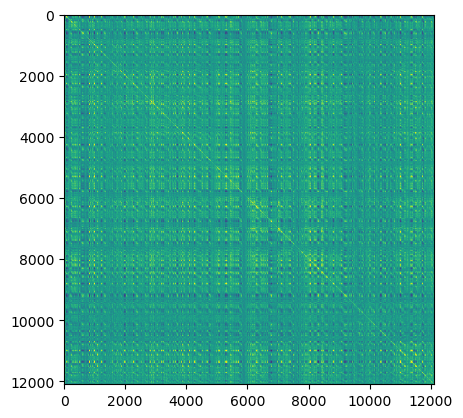

In [30]:
plt.imshow(corr, vmin=-.2, vmax=.2)

In [ ]:
# repackage the corr matrix into a long format
# with the columns: unit_id, unit_id2, correlation
corr_df=pd.DataFrame(corr)
corr_df.index.name='index'
corr_df.reset_index(inplace=True)
corr_df=pd.melt(corr_df, id_vars='index', var_name='index2', value_name='corr')
corr_df=corr_df[corr_df.pt_root_id != corr_df.pt_root_id2]
corr_df.shape


In [ ]:
corr_df

In [ ]:
# plot the reponses as a heatmap
import matplotlib.pyplot as plt
plt.imshow(resp[0:1000,0:5000], vmax=100)
plt.colorbar()
plt.show()


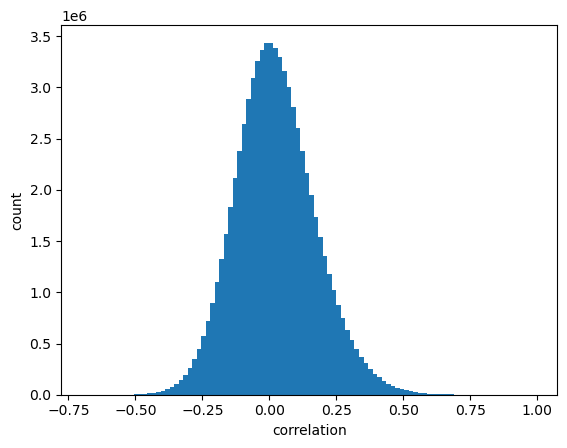

In [33]:
# plot the distribution of correlations
import matplotlib.pyplot as plt
plt.hist(corr[np.triu_indices_from(corr,1)], bins=100)
plt.xlabel('correlation')
plt.ylabel('count')
plt.show()


In [18]:
ct_df = client.materialize.query_table('aibs_soma_nuc_exc_mtype_preds_v117')

,index,animal_id,scan_session,scan_idx,unit_id,row_idx,id,created,valid,target_id,...,score,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position
0,0,17797,4,7,648,517,2043,2023-04-05 22:38:59.933339+00:00,t,516506,...,11.443982,516506,2020-09-28 22:44:43.650751+00:00,t,276.767375,105487283075464806,864691135348268503,"[296208, 94688, 15803]","[nan, nan, nan]","[nan, nan, nan]"
1,1,17797,4,7,662,530,10173,2023-04-05 22:39:40.786518+00:00,t,452329,...,12.006788,452329,2020-09-28 22:45:02.852190+00:00,t,311.618437,101758289725398433,864691135700505634,"[269248, 98832, 18382]","[nan, nan, nan]","[nan, nan, nan]"
2,2,17797,4,7,665,533,10871,2023-04-05 22:39:41.400499+00:00,t,451461,...,15.025886,451461,2020-09-28 22:41:51.543636+00:00,t,263.504036,102531727972419182,864691135776919981,"[274864, 94064, 22046]","[nan, nan, nan]","[nan, nan, nan]"
3,3,17797,4,7,671,539,8088,2023-04-05 22:39:27.234487+00:00,t,420222,...,21.035651,420222,2020-09-28 22:45:01.445495+00:00,t,309.882880,100491446037118564,864691135472842290,"[259936, 97360, 16974]","[nan, nan, nan]","[nan, nan, nan]"
4,4,17797,4,7,682,549,1480,2023-04-05 22:36:19.482289+00:00,t,420058,...,2.794440,420058,2020-09-28 22:44:36.438460+00:00,t,267.026432,98661652329244694,864691135349237975,"[246448, 95856, 15873]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12089,12089,17797,9,6,5438,104115,5562,2023-04-05 22:39:09.805943+00:00,t,361561,...,9.632237,361561,2020-09-28 22:43:06.085841+00:00,t,236.647219,96132845176740787,864691135781887568,"[228384, 128928, 22087]","[nan, nan, nan]","[nan, nan, nan]"
12090,12090,17797,9,6,5440,104117,4117,2023-04-05 22:39:06.773396+00:00,t,453466,...,7.538609,453466,2020-09-28 22:44:01.851199+00:00,t,204.619121,101902600424845804,864691135570701037,"[270016, 125200, 16511]","[nan, nan, nan]","[nan, nan, nan]"
12091,12091,17797,9,6,5442,104118,12695,2023-04-05 22:39:50.561720+00:00,t,454429,...,6.338806,454429,2020-09-28 22:44:57.887482+00:00,t,302.604124,100846657952086852,864691136041523030,"[262384, 122416, 24312]","[nan, nan, nan]","[nan, nan, nan]"
12092,12092,17797,9,6,5445,104121,3638,2023-04-05 22:39:03.595735+00:00,t,391240,...,6.547998,391240,2020-09-28 22:44:44.233528+00:00,t,278.654648,98172989136264833,864691135749568041,"[242896, 124752, 23096]","[nan, nan, nan]","[nan, nan, nan]"


In [24]:
ct_merge_df=pd.merge(coreg_in_silico.reset_index(), ct_df[['pt_root_id', 'id_ref', 'cell_type']], on='pt_root_id')

In [33]:
l2index=ct_merge_df.query('cell_type=="L2a"').index

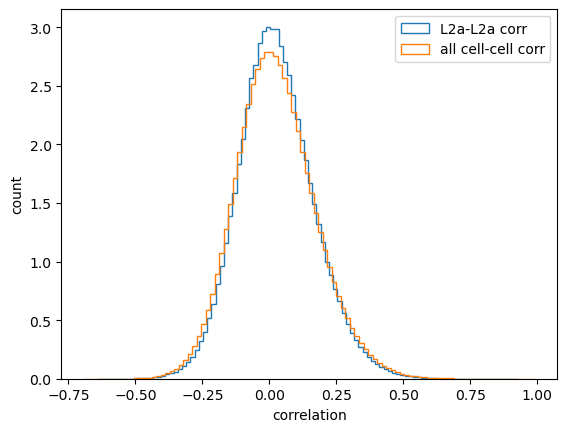

In [42]:

tempc= corr[l2index, :][:,l2index]
# plot the distribution of correlations
import matplotlib.pyplot as plt
plt.hist(tempc[np.triu_indices_from(tempc,1)], bins=100, density=True, histtype='step')
plt.hist(corr[np.triu_indices_from(corr,1)], bins=100,density=True, histtype='step')
plt.legend(['L2a-L2a corr', 'all cell-cell corr'])
plt.xlabel('correlation')
plt.ylabel('count')
plt.show()


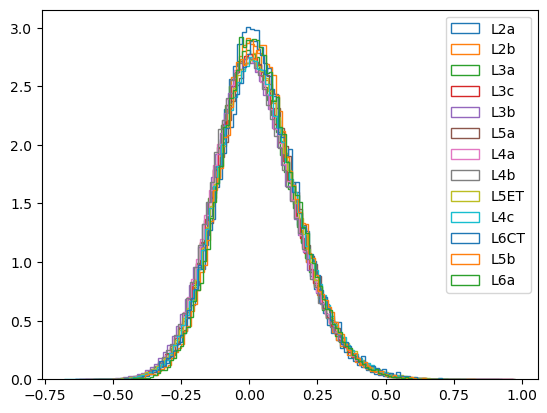

In [49]:
for cell_type in ct_merge_df.cell_type.unique():
    ctindex=ct_merge_df.query(f'cell_type=="{cell_type}"').index
    tempc= corr[ctindex, :][:,ctindex]
    if (len(ctindex)>100):
        plt.hist(tempc[np.triu_indices_from(tempc,1)], bins=100, density=True, histtype='step', label=cell_type)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


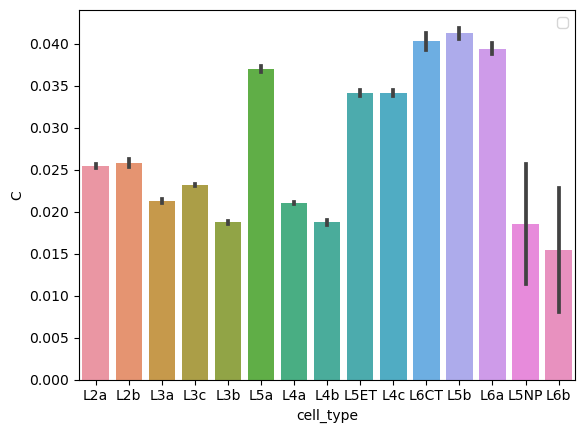

In [67]:
dfs = []

for cell_type in ct_merge_df.cell_type.unique():
    ctindex=ct_merge_df.query(f'cell_type=="{cell_type}"').index
    tempc= corr[ctindex, :][:,ctindex]
    vals = tempc[np.triu_indices_from(tempc,1)]

    dft = pd.DataFrame({'C':vals})
    dft['cell_type']=cell_type
    dfs.append(dft)

df=pd.concat(dfs)
sns.barplot(data=df, x='cell_type', y='C', errorbar='se')


<Axes: xlabel='cell_type', ylabel='C'>

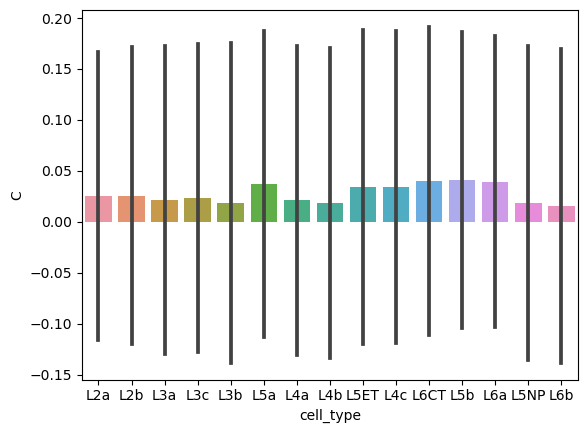

In [70]:
df=pd.concat(dfs)
sns.barplot(data=df, x='cell_type', y='C', errorbar='sd')

<Axes: xlabel='cell_type', ylabel='C'>

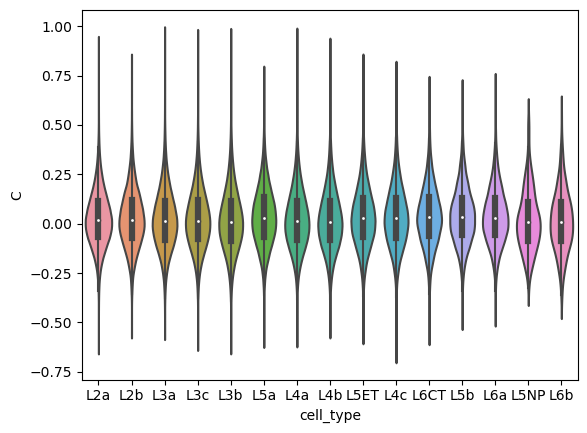

In [68]:

sns.violinplot(data=df, x='cell_type', y='C')


In [66]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ci='deprecated',
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or mo

In [18]:
import platform

In [22]:
platform.platform()

'Linux-4.14.318-241.531.amzn2.x86_64-x86_64-with-glibc2.35'